### Коллаборативная фильтрация

#### Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095448 sha256=4fd0f06bb5d6c76e7a88b81dfd45094beab77ec7e933f3e79035d8a355405017
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [65]:
from surprise import KNNWithMeans, NormalPredictor, SVD, NMF, SlopeOne
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

In [4]:
!wget 'https://drive.google.com/uc?id=1m0rwReR09achL0xTM6QPoN4tykz5bOMx' -O MovieLens.zip

--2023-05-21 12:01:53--  https://drive.google.com/uc?id=1m0rwReR09achL0xTM6QPoN4tykz5bOMx
Resolving drive.google.com (drive.google.com)... 74.125.137.102, 74.125.137.138, 74.125.137.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.137.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m29jdmdh06dnvhrlr4rlh3pqqpor4lcs/1684670475000/02611596255248067438/*/1m0rwReR09achL0xTM6QPoN4tykz5bOMx?uuid=eb881c27-5b0e-4c6c-b003-f6dc0e8f6974 [following]
--2023-05-21 12:01:55--  https://doc-0g-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m29jdmdh06dnvhrlr4rlh3pqqpor4lcs/1684670475000/02611596255248067438/*/1m0rwReR09achL0xTM6QPoN4tykz5bOMx?uuid=eb881c27-5b0e-4c6c-b003-f6dc0e8f6974
Resolving doc-0g-84-docs.googleusercontent.com (doc-0g-84-docs.googleusercontent.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to doc-0g

In [5]:
!unzip MovieLens.zip

Archive:  MovieLens.zip
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


In [6]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [7]:
movies_with_ratings = movies.merge(ratings, on='movieId').reset_index(drop=True)
movies_with_ratings.dropna(inplace=True)
movies_with_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [50]:
dataset = pd.DataFrame({
    'uid': movies_with_ratings.userId,
    'iid': movies_with_ratings.title,
    'rating': movies_with_ratings.rating
})

In [53]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(dataset, reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=1)

#### Применение различных алгоритмов из библиотеки surprise

https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html

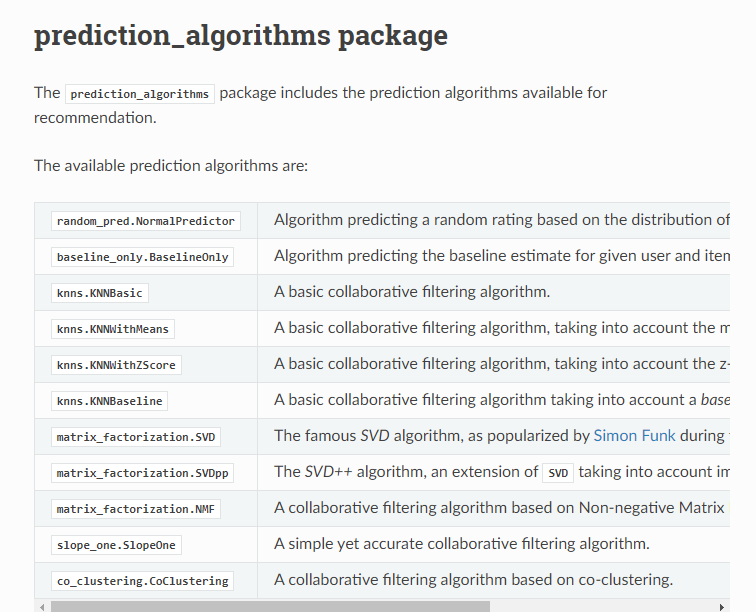

KNNWithMeans

In [82]:
algo = KNNWithMeans(k=70, sim_options={
    'name': 'pearson',
    'user_based': True 
})

cross_validate(algo, data, cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8998  0.8945  0.8977  0.8997  0.9007  0.8985  0.0022  
MAE (testset)     0.6840  0.6816  0.6857  0.6839  0.6826  0.6836  0.0014  
Fit time          0.28    0.25    0.25    0.42    0.28    0.30    0.06    
Test time         1.50    1.50    1.53    2.39    1.53    1.69    0.35    


{'test_rmse': array([0.89984591, 0.8944827 , 0.89767093, 0.89967209, 0.90072215]),
 'test_mae': array([0.68396853, 0.68157342, 0.68572087, 0.68391944, 0.68264567]),
 'fit_time': (0.27756714820861816,
  0.252532958984375,
  0.25460124015808105,
  0.42337799072265625,
  0.2843663692474365),
 'test_time': (1.5049395561218262,
  1.4961585998535156,
  1.5264976024627686,
  2.389300584793091,
  1.5272321701049805)}

Другой способ

In [66]:
from surprise.model_selection import KFold

kf = KFold(n_splits=5, random_state=4)

algo2 = KNNWithMeans(k=50, sim_options={
    'name': 'cosine',
    'user_based': True  
})

for trainset, testset in kf.split(data):
    algo2.fit(trainset)
    predictions = algo2.test(testset)
    accuracy.rmse(predictions, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8944
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9046
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8966
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9115
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8950


SVD

Получили RMSE меньше 0.87

In [110]:
algo3 = SVD(n_epochs=50, reg_all=0.05)

cross_validate(algo3, data, cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8630  0.8678  0.8533  0.8569  0.8533  0.8589  0.0057  
MAE (testset)     0.6612  0.6646  0.6553  0.6568  0.6504  0.6577  0.0049  
Fit time          3.74    4.43    3.73    3.74    4.45    4.02    0.34    
Test time         0.18    0.13    0.15    0.45    0.14    0.21    0.12    


{'test_rmse': array([0.86303508, 0.86783044, 0.85327382, 0.85691772, 0.85325151]),
 'test_mae': array([0.66121053, 0.66464811, 0.65533507, 0.65680263, 0.65042606]),
 'fit_time': (3.743051290512085,
  4.434287786483765,
  3.729041576385498,
  3.742299795150757,
  4.445411443710327),
 'test_time': (0.18244123458862305,
  0.13109254837036133,
  0.14655399322509766,
  0.45244717597961426,
  0.13608646392822266)}

NormalPredictor

In [69]:
algo4 = NormalPredictor()

cross_validate(algo4, data, cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4304  1.4243  1.4180  1.4342  1.4262  1.4266  0.0055  
MAE (testset)     1.1424  1.1329  1.1287  1.1454  1.1393  1.1377  0.0061  
Fit time          0.79    0.15    0.15    0.16    0.15    0.28    0.25    
Test time         0.48    0.14    0.13    0.12    0.14    0.20    0.14    


{'test_rmse': array([1.43044102, 1.4242663 , 1.41797295, 1.43415591, 1.42615293]),
 'test_mae': array([1.14238305, 1.13285611, 1.1286759 , 1.1454036 , 1.13932861]),
 'fit_time': (0.7898313999176025,
  0.15404844284057617,
  0.1474316120147705,
  0.16101765632629395,
  0.14961886405944824),
 'test_time': (0.4827401638031006,
  0.137115478515625,
  0.12547659873962402,
  0.11941289901733398,
  0.13843083381652832)}

NMF

In [72]:
algo5 = NMF(random_state=1)

cross_validate(algo5, data, cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9184  0.9134  0.9182  0.9185  0.9287  0.9194  0.0050  
MAE (testset)     0.7044  0.6982  0.7053  0.7026  0.7103  0.7042  0.0039  
Fit time          2.99    2.90    4.14    3.30    3.49    3.36    0.44    
Test time         0.12    0.11    0.31    0.16    0.12    0.16    0.08    


{'test_rmse': array([0.91836094, 0.91339346, 0.91824046, 0.91851766, 0.92865187]),
 'test_mae': array([0.70442101, 0.69818231, 0.70532922, 0.70259922, 0.71031163]),
 'fit_time': (2.9943454265594482,
  2.8968656063079834,
  4.13973593711853,
  3.3003833293914795,
  3.4927167892456055),
 'test_time': (0.11750626564025879,
  0.11182785034179688,
  0.30954456329345703,
  0.15663576126098633,
  0.11737775802612305)}

SlopeOne

In [73]:
algo6 = SlopeOne()

cross_validate(algo6, data, cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9074  0.9072  0.9005  0.9013  0.8999  0.9033  0.0033  
MAE (testset)     0.6925  0.6931  0.6840  0.6897  0.6892  0.6897  0.0032  
Fit time          5.97    5.45    12.96   7.28    5.77    7.49    2.81    
Test time         8.58    10.46   8.53    9.91    10.17   9.53    0.81    


{'test_rmse': array([0.90743493, 0.90718866, 0.90051775, 0.90130703, 0.89990382]),
 'test_mae': array([0.69248824, 0.69312171, 0.68399325, 0.68968098, 0.68919388]),
 'fit_time': (5.968184232711792,
  5.452042102813721,
  12.963555097579956,
  7.27902364730835,
  5.770089626312256),
 'test_time': (8.58233118057251,
  10.456168174743652,
  8.525144815444946,
  9.905314207077026,
  10.17075800895691)}

Посмотрев на разные алгоритмы и параметры не получилось добиться RMSE ниже 87 (кроме SVD). Посмотрим на все алгоритмы без параметров и возьмем тот алгоритм, который покажет самый низкий показатель RMSE.

In [111]:
from surprise import KNNBaseline, KNNWithZScore, BaselineOnly, KNNBasic

result = []
for algorithm in [SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), 
                  KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly()]:
  results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
 
  tmp = pd.DataFrame.from_dict(results).mean(axis=0)
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
  result.append(tmp)

<ipython-input-111-e6f210078e52>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
<ipython-input-111-e6f210078e52>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
<ipython-input-111-e6f210078e52>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


<ipython-input-111-e6f210078e52>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


<ipython-input-111-e6f210078e52>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


<ipython-input-111-e6f210078e52>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


<ipython-input-111-e6f210078e52>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


<ipython-input-111-e6f210078e52>:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))


Получилось что модель BaselineOnly показала лучший результат, тогда ее и возьмем

In [112]:
pd.DataFrame(result)

,test_rmse,fit_time,test_time,Algorithm
0,0.901605,6.100420,7.878921,SlopeOne
1,0.921331,3.076372,0.140512,NMF
2,1.425984,0.150919,0.259744,NormalPredictor
3,0.876324,0.505077,1.737107,KNNBaseline
4,0.947149,0.128765,1.592526,KNNBasic
5,0.897818,0.163509,1.679460,KNNWithMeans
6,0.895630,0.229926,1.582705,KNNWithZScore
7,0.872811,0.485075,0.222871,BaselineOnly


И так, получилось добиться метрики меньше 0.87 RMSE

In [107]:
algo7 = BaselineOnly(bsl_options = {"method": "als", "n_epochs": 100, "reg_u": 12, "reg_i": 2})

cross_validate(algo7, data, cv=5, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8725  0.8637  0.8682  0.8601  0.8615  0.8652  0.0046  
MAE (testset)     0.6703  0.6647  0.6655  0.6609  0.6606  0.6644  0.0036  
Fit time          4.07    3.33    5.00    4.31    3.67    4.08    0.57    
Test time         0.08    0.07    0.27    0.08    0.08    0.12    0.08    


{'test_rmse': array([0.87252142, 0.8636985 , 0.86823823, 0.86011648, 0.8615371 ]),
 'test_mae': array([0.67033646, 0.66472027, 0.66554286, 0.66089237, 0.66059924]),
 'fit_time': (4.073749303817749,
  3.33368182182312,
  4.995759963989258,
  4.3126490116119385,
  3.6706817150115967),
 'test_time': (0.07802987098693848,
  0.07414746284484863,
  0.27399110794067383,
  0.0830545425415039,
  0.08048820495605469)}

### Выводы

В этом задании изучил работу библиотеки surprise и как она обарачивает данные в свою обертку для оптимального использования.

Также научился подбирать оптимальные параметры для улучшения метрики.